***
## Loading Packages
***

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import squarify
import sklearn.metrics

***
## Loading Data
***

In [2]:
print(os.getcwd())
os.chdir('D:\\downloads')
os.getcwd()

C:\Users\karan\Desktop\Rahul-Codes\directory\DataSciencePython\Untitled Folder


'D:\\downloads'

In [3]:
data = pd.read_excel("E-com_Data.xlsx")

In [4]:
data.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
print("Number of unique customers: ",data['CustomerID'].nunique())
print("Number of unique Items: ",data['Item Code'].nunique())
print("Number of unique Orders: ",data['InvoieNo'].nunique())

Number of unique customers:  4349
Number of unique Items:  4009
Number of unique Orders:  24928


***
## Data Cleaning
***

In [7]:
# Checking missing values

data.isna().sum()/len(data)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

***
1. CustomerID - 24.86% missing values
***
2. Cancelled_status - 98.44% missing values
***
3. Reason of return - 99.99% missing values
***
4. Sold as set - 100% missing values

***

In [8]:
print(data['Cancelled_status'].value_counts())
data[data['Cancelled_status']==True]

1.0    8345
Name: Cancelled_status, dtype: int64


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
31,4325.0,14619,366771,2017-01-31,-1,11:07:00,179.0,-179.0,Location 1,1.0,NaN,NaN
121,4107.0,15364,364641,2016-12-21,-1,12:41:00,885.0,-885.0,Location 1,1.0,NaN,NaN
153,4043.0,85014B,387837,2017-08-10,-1,12:18:00,694.0,-694.0,Location 1,1.0,NaN,NaN
252,3951.0,14614,384727,2017-07-20,-1,13:33:00,943.0,-943.0,Location 1,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537854,3802.0,14693,377012,2017-05-06,-1,11:21:00,382.0,-382.0,Location 8,1.0,NaN,NaN
537866,3309.0,85194L,372168,2017-03-31,-8,11:02:00,122.0,-976.0,Location 8,1.0,NaN,NaN
537867,3309.0,85194L,372305,2017-03-28,-8,16:34:00,106.0,-848.0,Location 8,1.0,NaN,NaN
537898,1633.0,14693,393042,2017-09-24,-2,10:40:00,394.0,-788.0,Location 8,1.0,NaN,NaN


In [9]:
data['Quantity'][data['Cancelled_status']==True].describe()

count    8345.000000
mean       -5.241462
std         9.010424
min      -152.000000
25%        -6.000000
50%        -2.000000
75%        -1.000000
max        -1.000000
Name: Quantity, dtype: float64

***
Whereever the order is cancelled (i.e. True), we have a negative quantity.
***

So, we can use the same idea for filling missing values in "Cancelled_status" column
***

In [10]:
(data['Cancelled_status'][data['Cancelled_status'].isna()])=(data['Quantity'][data['Cancelled_status'].isna()]).apply(lambda x: 1.0 if x < 0 else 0.0)

print(data['Cancelled_status'].value_counts())

len(data[data['Quantity']<0])

0.0    528476
1.0      9503
Name: Cancelled_status, dtype: int64


<ipython-input-10-1c43a0a4b5f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (data['Cancelled_status'][data['Cancelled_status'].isna()])=(data['Quantity'][data['Cancelled_status'].isna()]).apply(lambda x: 1.0 if x < 0 else 0.0)


9503

***
For Columns 'Reason of return' ,'Sold as set' , almost 100% data is missing, so we drop these columns
***
Could have dropped 'Cancelled Status' too, bt there we found a much better reason to fill those values
***

In [11]:
data['Date of purchase'].min()

Timestamp('2016-12-02 00:00:00')

In [12]:
data['Date of purchase'].max()

Timestamp('2017-12-19 00:00:00')

In [13]:
data.drop(columns=['Reason of return','Sold as set'],inplace=True)

***
Now for CustomerID
***

In [14]:
data[~data['CustomerID'].isna()]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0
...,...,...,...,...,...,...,...,...,...,...
537945,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,0.0
537946,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,0.0
537947,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,0.0
537948,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,0.0


In [15]:
data[data['CustomerID'].isna()]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
2925,NaN,14045,395775,2017-10-21,-45,10:14:00,62.0,-2790.0,Location 1,1.0
2926,NaN,15734,396260,2017-10-18,-6,12:02:00,261.0,-1566.0,Location 1,1.0
2927,NaN,14615,382089,2017-06-21,-9,13:09:00,12.0,-108.0,Location 1,1.0
2928,NaN,14619,384585,2017-07-09,1,16:26:00,99.0,99.0,Location 1,0.0
2929,NaN,14619,390367,2017-09-12,1,12:17:00,118.0,118.0,Location 1,0.0
...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8,0.0
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8,0.0
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8,0.0
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8,0.0


In [16]:
data=data[~data['CustomerID'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   404189 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 33.9+ MB


In [17]:
# Checking duplicate values

print('Number of Duplicate rows :',data.duplicated().sum())
data[data.duplicated()]

Number of Duplicate rows : 8


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,0.0
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,0.0
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,0.0
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,0.0
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,0.0
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,0.0
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,0.0
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,0.0


In [18]:
data.drop_duplicates(ignore_index=True,inplace=True)

***
Entries with same item code, InvoieNo are also duplicates. 
***
because same item placed more than once on same bill is not possible, addition will be in quantity column
***

In [19]:
print('Duplicate entries with same Item Code and InvoiceNo :',data.duplicated(['Item Code','InvoieNo']).sum())

Duplicate entries with same Item Code and InvoiceNo : 10148


***
There are 10148 such duplicate values
***
Keeping only last entry as unique entry.
***

In [20]:
filtered_data=data.drop_duplicates(['Item Code','InvoieNo'],keep='last',ignore_index=True)

***
###### Customers with overall negative quantity

Who cancelled more than they ordered. we will get rid of them
***

In [21]:
net_quant=filtered_data.groupby(['CustomerID']).agg({
"Quantity":'sum'}).reset_index()


print("Number of customers with negative Quantity :",len(net_quant[net_quant['Quantity']<0]))
net_quant[net_quant['Quantity']<0]

Number of customers with negative Quantity : 26


,CustomerID,Quantity
209,213.0,-4
411,416.0,-2
463,468.0,-1
997,1005.0,-6
1192,1201.0,-23
1310,1319.0,-2
1679,1689.0,-5
1718,1728.0,-1
1790,1800.0,-9
2423,2437.0,-52


In [22]:
negative_customers=net_quant['CustomerID'][net_quant['Quantity']<0]
negative_list = negative_customers.tolist()

filtered_data=filtered_data[~filtered_data['CustomerID'].isin(negative_list)]

***
###### Customers with ZERO quantity

Who cancelled all their orders
***

In [23]:
zero_quant=net_quant['CustomerID'][net_quant['Quantity']==0]
zero_list = zero_quant.tolist()

print("Number of customers who cancelled all the orders :",len(zero_list))
net_quant[net_quant['Quantity']==0]

Number of customers who cancelled all the orders : 8


,CustomerID,Quantity
167,171.0,0
210,214.0,0
768,776.0,0
984,992.0,0
1800,1810.0,0
3332,3350.0,0
4335,4359.0,0
4340,4364.0,0


In [24]:
filtered_data=filtered_data[~filtered_data['CustomerID'].isin(zero_list)]

***
## Data Insights
***

In [25]:
data['Shipping Location'].value_counts()[:10]/len(data)

Location 36    0.931130
Location 14    0.020575
Location 26    0.017272
Location 15    0.010552
Location 1     0.007237
Location 11    0.005584
Location 37    0.001841
Location 25    0.001450
Location 21    0.001279
Location 20    0.000997
Name: Shipping Location, dtype: float64

***
Around 93% of origional data belongs to just 1 location i.e. "Location 36"
***

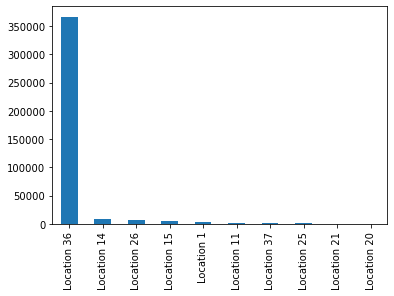

In [26]:
filtered_data['Shipping Location'].value_counts()[:10].plot(kind='bar')

***
Lets see how many total customers does location 36 covers
***

In [27]:
unique_customers=filtered_data['CustomerID'].unique()
print('number of unique customers in all data: ', len(unique_customers))
unique_list = unique_customers.tolist()


Loc36_customers=filtered_data['CustomerID'][filtered_data['Shipping Location']=='Location 36'].unique()
print('number of unique customers in "Location 36": ', len(Loc36_customers),)
Loc36_list = Loc36_customers.tolist()

number of unique customers in all data:  4315
number of unique customers in "Location 36":  4314


***
Only one customers is not shipping at Location 36, Lets check that customer
***


In [28]:
print([i for i in unique_list if i not in Loc36_list])

[3244.0]


In [29]:
filtered_data[filtered_data.CustomerID==3244]


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
393788,3244.0,46000U,369050,2017-02-16,3,09:46:00,167.0,501.0,Location 4,0.0


***
Customer '3244' just ordered once that too 8 months back, we can ignore that for further analysis
***

***
Also Let's see the number/percentage of orders with shipping location as "Location 36"
***

In [30]:
print('Total number of orders :',filtered_data['InvoieNo'].nunique())
print('Number of orders belonging to Location 36 :',filtered_data['InvoieNo'][filtered_data['Shipping Location']=='Location 36'].nunique())
print('Number of orders not belonging to Location 36 :',filtered_data['InvoieNo'].nunique()-filtered_data['InvoieNo'][filtered_data['Shipping Location']=='Location 36'].nunique())
print('Percentage of orders not belonging to Location 36 :',((filtered_data['InvoieNo'].nunique()-filtered_data['InvoieNo'][filtered_data['Shipping Location']=='Location 36'].nunique())/filtered_data['InvoieNo'].nunique())*100)

Total number of orders : 21540
Number of orders belonging to Location 36 : 21316
Number of orders not belonging to Location 36 : 224
Percentage of orders not belonging to Location 36 : 1.0399257195914577


***
It is clear that around 99% of orders(unique Invoice Numbers) are covered under "Location 36"

***
But there is one more finding which shows that same order(Invoice Number) had 2 or more Shipping locations,
So, Lets keep Location 36 as Primary Shipping location for such data, deleting Products(Item Code) that were delivered to other locations with same Invoice Number.
***

In [31]:
order_locations=filtered_data.groupby(['InvoieNo']).agg({
"Shipping Location":'nunique'}).reset_index()

In [32]:
order_locations[order_locations['Shipping Location']>1]

,InvoieNo,Shipping Location
15,361445,2
16,361446,2
21,361451,2
23,361453,3
24,361454,2
...,...,...
21530,406642,2
21531,406643,3
21532,406644,2
21537,406649,4


***
##### We will procede with just 1 Shipping Location i.e "Location 36"  as it covers almost every customer and every order placed

***

In [33]:
filtered_data=filtered_data[filtered_data['Shipping Location']=='Location 36']
filtered_data['Shipping Location'].value_counts()

Location 36    366477
Name: Shipping Location, dtype: int64

In [34]:

filtered_data[['CustomerID','InvoieNo']]=filtered_data[['CustomerID','InvoieNo']].astype('object')

In [35]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366477 entries, 26163 to 393014
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         366477 non-null  object        
 1   Item Code          366477 non-null  object        
 2   InvoieNo           366477 non-null  object        
 3   Date of purchase   366477 non-null  datetime64[ns]
 4   Quantity           366477 non-null  int64         
 5   Time               366477 non-null  object        
 6   price per Unit     366477 non-null  float64       
 7   Price              366477 non-null  float64       
 8   Shipping Location  366477 non-null  object        
 9   Cancelled_status   366477 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 30.8+ MB


****
###### Combining Date,time column
****

In [36]:
filtered_data['Date_Time'] = filtered_data['Date of purchase'].astype(str) + ' ' +  filtered_data['Time'].astype(str)

# Converting to date_time
filtered_data['Date_Time']=pd.to_datetime(filtered_data['Date_Time'])
filtered_data.head()


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time
26163,4372,39845,395779,2017-10-14,24,10:23:00,45.0,1080.0,Location 36,0.0,2017-10-14 10:23:00
26164,4372,15178,379129,2017-06-01,12,10:39:00,92.0,1104.0,Location 36,0.0,2017-06-01 10:39:00
26165,4372,15177,379129,2017-05-25,12,10:39:00,98.0,1176.0,Location 36,0.0,2017-05-25 10:39:00
26166,4372,14844,395779,2017-10-17,12,10:23:00,106.0,1272.0,Location 36,0.0,2017-10-17 10:23:00
26167,4372,15801,395779,2017-10-15,24,10:23:00,53.0,1272.0,Location 36,0.0,2017-10-15 10:23:00


***
###### Now, there is one more problem. 
Same Invoice is used for multiple dates, which is also not possible

may be due to wrong data entry

We will tackle this later while grouping data by InvoiceNo
***

In [37]:
# for example for 366660 invoice number
filtered_data['Date of purchase'][filtered_data['InvoieNo']==366660].value_counts()

2017-01-29    13
2017-01-21    13
2017-01-20    12
2017-01-28    12
2017-01-22    10
2017-01-25    10
2017-01-23     8
2017-01-26     8
2017-01-27     7
2017-01-24     1
Name: Date of purchase, dtype: int64

***
For every Invoice number, there are total 10 dates(one of them is origional date of order) 


We will either chose min or max while grouping them later 
***

In [38]:
filtered_data.describe()

,Quantity,price per Unit,Price,Cancelled_status
count,366477.000000,366477.000000,366477.000000,366477.000000
mean,11.579829,343.836183,2515.862210,0.019707
std,29.184530,430.546286,4891.531069,0.138990
min,-152.000000,2.000000,-10104.000000,0.000000
25%,2.000000,159.000000,593.000000,0.000000
50%,5.000000,239.000000,1605.000000,0.000000
75%,12.000000,414.000000,2520.000000,0.000000
max,3186.000000,64973.000000,90400.000000,1.000000


In [39]:
filtered_data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time
26163,4372,39845,395779,2017-10-14,24,10:23:00,45.0,1080.0,Location 36,0.0,2017-10-14 10:23:00
26164,4372,15178,379129,2017-06-01,12,10:39:00,92.0,1104.0,Location 36,0.0,2017-06-01 10:39:00
26165,4372,15177,379129,2017-05-25,12,10:39:00,98.0,1176.0,Location 36,0.0,2017-05-25 10:39:00
26166,4372,14844,395779,2017-10-17,12,10:23:00,106.0,1272.0,Location 36,0.0,2017-10-17 10:23:00
26167,4372,15801,395779,2017-10-15,24,10:23:00,53.0,1272.0,Location 36,0.0,2017-10-15 10:23:00


In [40]:
# New Feature YearMonth
filtered_data['YearMonth']=filtered_data['Date_Time'].map(lambda date: 100*date.year + date.month)

In [41]:
filtered_data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time,YearMonth
26163,4372,39845,395779,2017-10-14,24,10:23:00,45.0,1080.0,Location 36,0.0,2017-10-14 10:23:00,201710
26164,4372,15178,379129,2017-06-01,12,10:39:00,92.0,1104.0,Location 36,0.0,2017-06-01 10:39:00,201706
26165,4372,15177,379129,2017-05-25,12,10:39:00,98.0,1176.0,Location 36,0.0,2017-05-25 10:39:00,201705
26166,4372,14844,395779,2017-10-17,12,10:23:00,106.0,1272.0,Location 36,0.0,2017-10-17 10:23:00,201710
26167,4372,15801,395779,2017-10-15,24,10:23:00,53.0,1272.0,Location 36,0.0,2017-10-15 10:23:00,201710


***
## Some more Exploratory customer analysis
***

In [42]:
cust_grouping=filtered_data.groupby(['CustomerID']).agg({
"Price":'sum'}).reset_index()
cust_grouping.describe()

,CustomerID,Price
count,4314.000000,4.314000e+03
mean,2185.055169,2.137241e+05
std,1260.653773,7.747184e+05
min,2.000000,3.880000e+02
25%,1094.250000,3.569150e+04
50%,2182.500000,7.824200e+04
75%,3277.750000,1.926202e+05
max,4372.000000,3.077583e+07


In [43]:
# The top half
print('The top half of customers contributes ',(cust_grouping['Price'].sort_values(ascending=False).head(2157).sum()/cust_grouping['Price'].sum())*100,'of the gross revenues')

# The top 25%
print('The top Quartile of customers contributes ',(cust_grouping['Price'].sort_values(ascending=False).head(1079).sum()/cust_grouping['Price'].sum())*100,'of the gross revenues')

# The top decile
print('The top Decile of customers contributes ',(cust_grouping['Price'].sort_values(ascending=False).head(431).sum()/cust_grouping['Price'].sum())*100,'of the gross revenues')

The top half of customers contributes  91.19546433140833 of the gross revenues
The top Quartile of customers contributes  76.59360346534108 of the gross revenues
The top Decile of customers contributes  56.9289635632216 of the gross revenues


***
Lets divide customers into quartiles based on revenue generated by them
***

In [44]:

customer_seg = []
revenue_cont = []

for x in range(0, 4314, 1078):
    tr = cust_grouping['Price'].sort_values(ascending=False).head(x).sum()
    revenue_cont.append(tr)
    customer_seg.append(x)

revenue_cont

[0.0, 706004500.0, 840749066.0, 899257690.0, 922004513.0]

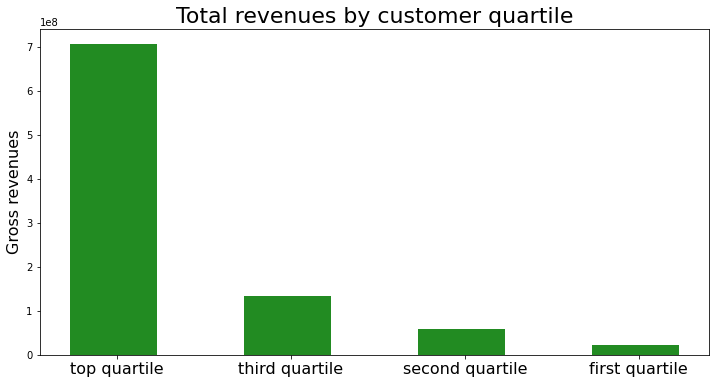

In [45]:
labels = ['top quartile', 'third quartile', 'second quartile', 'first quartile']
rev_by_quartile = [706006793, 840751359-706006793, 899260665-840751359, 922007488-899260665]

x = np.arange(len(labels))  # the label locations
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/25, rev_by_quartile, width, color='forestgreen')

ax.set_ylabel('Gross revenues', fontsize=16)
ax.set_title('Total revenues by customer quartile', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

***
The top half of customers contribute 91.2% of the gross revenues

The top 25% of customers contribute 76.6% of the gross revenues

The top decile of customers contribute 56.9% of the gross revenues

***

In [46]:
cust_freq=filtered_data.groupby(['CustomerID']).agg({
"InvoieNo":'nunique'}).reset_index()
cust_freq

,CustomerID,InvoieNo
0,2.0,7
1,3.0,4
2,4.0,1
3,5.0,1
4,6.0,8
...,...,...
4309,4368.0,1
4310,4369.0,1
4311,4370.0,2
4312,4371.0,15


In [47]:

print(cust_freq['InvoieNo'].sort_values(ascending=False).head(2157).sum()/cust_freq['InvoieNo'].sum())

print(cust_freq['InvoieNo'].sort_values(ascending=False).head(1079).sum()/cust_freq['InvoieNo'].sum())

print(cust_freq['InvoieNo'].sort_values(ascending=False).head(431).sum()/cust_freq['InvoieNo'].sum())


0.8579001688872209
0.664899605929818
0.4393413398386189


***
Lets divide customers into quartiles based on orders placed by them
***

In [48]:
customer_seg_1 = []
freq_cont = []

for x in range(0, 4314, 1078):
    tr = cust_freq['InvoieNo'].sort_values(ascending=False).head(x).sum()
    freq_cont.append(tr)
    customer_seg_1.append(x)

freq_cont

[0, 14168, 18284, 20236, 21314]

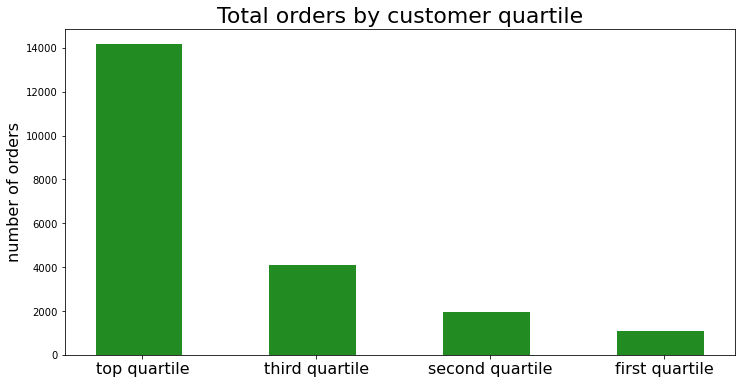

In [49]:
labels = ['top quartile', 'third quartile', 'second quartile', 'first quartile']
rev_by_quartile = [14168, 18284-14168, 20236-18284, 21314-20236]

x = np.arange(len(labels))  # the label locations
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/25, rev_by_quartile, width, color='forestgreen')

ax.set_ylabel('number of orders', fontsize=16)
ax.set_title('Total orders by customer quartile', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

***
The top half of customers contribute 85.8% of the total orders placed

The top 25% of customers contribute 66.5% of the total orders placed

The top decile of customers contribute 43.9% of the total orders placed 
***

***
### Solving date issue(10 dates of purchase for 1 Invoice)
we will take min or max of the dates given for each Invoice. 
***

In [50]:
data_recency=filtered_data.groupby(['CustomerID','InvoieNo']).agg({
        'Date_Time': 'max',}).reset_index()
data_recency

,CustomerID,InvoieNo,Date_Time
0,2.0,362690,2016-12-17 14:57:00
1,2.0,367301,2017-02-04 14:30:00
2,2.0,374286,2017-04-17 10:43:00
3,2.0,381265,2017-06-19 13:01:00
4,2.0,387096,2017-08-11 08:48:00
...,...,...,...
21311,4371.0,404737,2017-12-10 12:59:00
21312,4371.0,405936,2017-12-16 12:02:00
21313,4372.0,379129,2017-06-01 10:39:00
21314,4372.0,395779,2017-10-22 10:23:00


***
###### Now finding Recency(number of days since last order)
***

In [51]:
# latest order placed
max_date = data_recency['Date_Time'].max() + timedelta(days=1)
print('latest order was placed on :',max_date)

latest order was placed on : 2017-12-20 12:50:00


In [52]:
cust_recency=data_recency.groupby(['CustomerID']).agg({
"Date_Time":lambda x: (max_date - x.max()).days}).reset_index()
cust_recency

,CustomerID,Date_Time
0,2.0,3
1,3.0,76
2,4.0,19
3,5.0,310
4,6.0,36
...,...,...
4309,4368.0,278
4310,4369.0,181
4311,4370.0,9
4312,4371.0,4


***
##### KPI Dataframes
***

In [53]:
kpis=filtered_data.groupby(['CustomerID','InvoieNo']).agg({
        'Date_Time': 'max',
'Price':'sum',
'Quantity':'sum'}).reset_index()
kpis['YearMonth']=kpis['Date_Time'].map(lambda date: 100*date.year + date.month)
kpis

,CustomerID,InvoieNo,Date_Time,Price,Quantity,YearMonth
0,2.0,362690,2016-12-17 14:57:00,67315.0,235,201612
1,2.0,367301,2017-02-04 14:30:00,53704.0,273,201702
2,2.0,374286,2017-04-17 10:43:00,77044.0,399,201704
3,2.0,381265,2017-06-19 13:01:00,42402.0,164,201706
4,2.0,387096,2017-08-11 08:48:00,64275.0,245,201708
...,...,...,...,...,...,...
21311,4371.0,404737,2017-12-10 12:59:00,26087.0,111,201712
21312,4371.0,405936,2017-12-16 12:02:00,26625.0,125,201712
21313,4372.0,379129,2017-06-01 10:39:00,92094.0,440,201706
21314,4372.0,395779,2017-10-22 10:23:00,145382.0,942,201710


In [54]:
# 1. Revenue, Active Customers, Quantity
m_kpis=kpis.groupby(['YearMonth']).agg({'Price': 'sum','CustomerID': 'nunique','Quantity':'sum','InvoieNo':'nunique'}).reset_index()

# 2. Generate Monthly Growth rate based on previous months revenue
m_kpis['MonthlyGrowth'] = m_kpis['Price'].pct_change()


In [55]:
# Generate new dataframe based on CustomerID and its first purchase date
customer_fist_purchase = filtered_data.groupby('CustomerID').Date_Time.min().reset_index()
customer_fist_purchase.columns = ['CustomerID','FirstPurchaseDate']
customer_fist_purchase['FirstPurchaseYearMonth'] = customer_fist_purchase['FirstPurchaseDate'].map(lambda date: 100*date.year + date.month)


In [56]:
customer_fist_purchase

,CustomerID,FirstPurchaseDate,FirstPurchaseYearMonth
0,2.0,2016-12-08 14:57:00,201612
1,3.0,2016-12-19 19:09:00,201612
2,4.0,2017-11-22 09:51:00,201711
3,5.0,2017-02-03 16:01:00,201702
4,6.0,2017-02-17 12:33:00,201702
...,...,...,...
4309,4368.0,2017-03-08 09:52:00,201703
4310,4369.0,2017-06-16 10:53:00,201706
4311,4370.0,2017-08-06 13:35:00,201708
4312,4371.0,2017-01-07 14:14:00,201701


In [57]:
m_kpis.rename(columns={'CustomerID': 'ActiveCustomers','InvoieNo': 'Number_of_Orders'}, inplace=True)
m_kpis

,YearMonth,Price,ActiveCustomers,Quantity,Number_of_Orders,MonthlyGrowth
0,201612,57698065.0,910,249082,1610,NaN
1,201701,36755958.0,557,165660,822,-0.362960
2,201702,46708762.0,795,207281,1201,0.270781
3,201703,58526957.0,915,264523,1414,0.253019
4,201704,63611951.0,1038,305012,1575,0.086883
5,201705,67001131.0,985,301341,1594,0.053279
6,201706,65131203.0,1026,297064,1626,-0.027909
7,201707,64268726.0,988,309699,1540,-0.013242
8,201708,72467416.0,965,349339,1476,0.127569
9,201709,79691553.0,1087,375079,1705,0.099688


In [58]:
# Add first purchase date column to the new Customer Dataframe by merging with the original filtered data
filtered_data = pd.merge(filtered_data, customer_fist_purchase, on='CustomerID')
filtered_data.set_index('Date of purchase', inplace=True)
filtered_data.head()

,CustomerID,Item Code,InvoieNo,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Date_Time,YearMonth,FirstPurchaseDate,FirstPurchaseYearMonth
Date of purchase,,,,,,,,,,,,,
2017-10-14,4372,39845,395779,24,10:23:00,45.0,1080.0,Location 36,0.0,2017-10-14 10:23:00,201710,2017-05-23 10:39:00,201705
2017-06-01,4372,15178,379129,12,10:39:00,92.0,1104.0,Location 36,0.0,2017-06-01 10:39:00,201706,2017-05-23 10:39:00,201705
2017-05-25,4372,15177,379129,12,10:39:00,98.0,1176.0,Location 36,0.0,2017-05-25 10:39:00,201705,2017-05-23 10:39:00,201705
2017-10-17,4372,14844,395779,12,10:23:00,106.0,1272.0,Location 36,0.0,2017-10-17 10:23:00,201710,2017-05-23 10:39:00,201705
2017-10-15,4372,15801,395779,24,10:23:00,53.0,1272.0,Location 36,0.0,2017-10-15 10:23:00,201710,2017-05-23 10:39:00,201705


In [59]:
# Create new column "User Type" and default it to "New" as its values. Assign "Existing" value if 
filtered_data['UserType'] = 'New'

filtered_data.loc[filtered_data['YearMonth']>filtered_data['FirstPurchaseYearMonth'],'UserType'] = 'Existing'

# Calculate the Revenue per month for each user type
customer_kpis = pd.DataFrame(filtered_data.groupby([filtered_data.index.year,filtered_data.index.month, filtered_data.UserType])
                             ['Price'].sum())
customer_kpis.index.set_names(['Year', 'Month', 'UserType'], inplace = True)


customer_kpis

Price
Year Month UserType             
2016 12    New        58555225.0
2017 1     Existing   25213203.0
           New        17215770.0
     2     Existing   33974026.0
           New        14256653.0
     3     Existing   39842559.0
           New        19808060.0
     4     Existing   44591025.0
           New        14541219.0
     5     Existing   59565500.0
           New        12142863.0
     6     Existing   53685935.0
           New        10159784.0
     7     Existing   57496934.0
           New         7524761.0
     8     Existing   65624614.0
           New         8661573.0
     9     Existing   70312001.0
           New        14865508.0
     10    Existing   94879661.0
           New        16995328.0
     11    Existing  109910803.0
           New        14083005.0
     12    Existing   56588373.0
           New         1511252.0

In [60]:
m_kpis['YearMonth']=m_kpis['YearMonth'].astype('str')

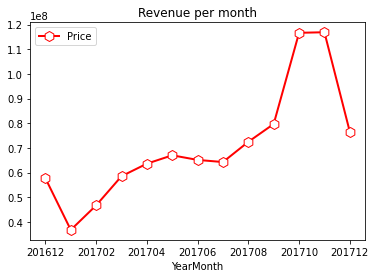

In [61]:
# Line Graph to capture the monthly revenue
m_kpis.plot.line(x='YearMonth',y='Price', title='Revenue per month',color = 'r',
         marker='h', 
         markersize=10, linewidth=2,
         markerfacecolor='white');

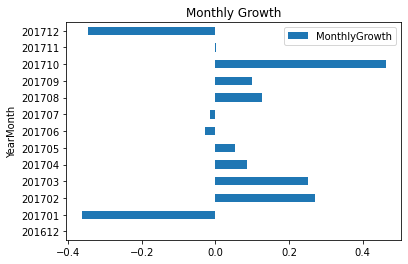

In [62]:
# Horizontal Bar Graph to capture monthly revenue growth
m_kpis.plot.barh(x='YearMonth',y='MonthlyGrowth',title='Monthly Growth', rot=0);



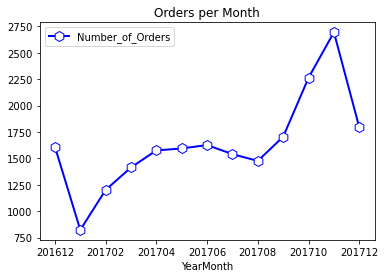

In [63]:
# Horizontal Bar graph to capture number of orders per month
m_kpis.plot.line(x='YearMonth',y='Number_of_Orders',title='Orders per Month',color = 'b',
         marker='h', 
         markersize=10, linewidth=2,

         markerfacecolor='white');



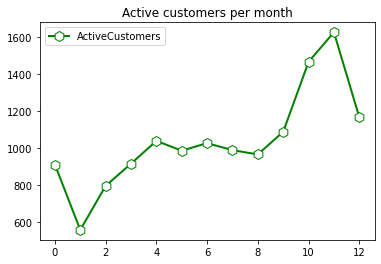

In [64]:
# Line graph to capture the active customers per month
m_kpis.plot.line(y='ActiveCustomers', title='Active customers per month',color = 'g',
         marker='h', 
         markersize=10, linewidth=2,

         markerfacecolor='white');



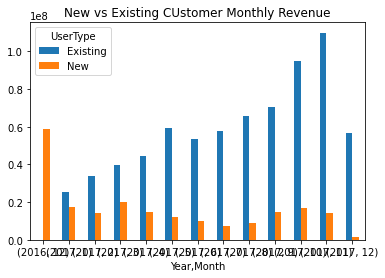

In [65]:
# Plot new vs existing customers

customer_kpis.unstack().plot.bar(y='Price', title='New vs Existing CUstomer Monthly Revenue', rot=0);

In [66]:
Prod_kpis=filtered_data.groupby(['Item Code']).agg({
        'Price': 'sum',
'Quantity':'sum',
'price per Unit':'mean'}).reset_index()


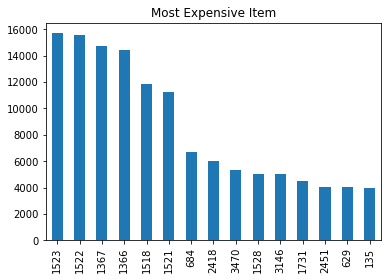

In [67]:
Prod_kpis['price per Unit'].sort_values(ascending=False)[:15].plot.bar(y='Price', title='Most Expensive Item')


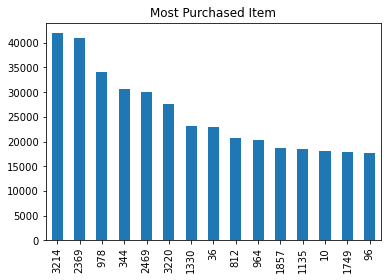

In [68]:
Prod_kpis['Quantity'].sort_values(ascending=False)[:15].plot.bar(y='Price', title='Most Purchased Item')


***
## RFM model building
***

In [69]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366477 entries, 2017-10-14 to 2017-04-10
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CustomerID              366477 non-null  object        
 1   Item Code               366477 non-null  object        
 2   InvoieNo                366477 non-null  object        
 3   Quantity                366477 non-null  int64         
 4   Time                    366477 non-null  object        
 5   price per Unit          366477 non-null  float64       
 6   Price                   366477 non-null  float64       
 7   Shipping Location       366477 non-null  object        
 8   Cancelled_status        366477 non-null  float64       
 9   Date_Time               366477 non-null  datetime64[ns]
 10  YearMonth               366477 non-null  int64         
 11  FirstPurchaseDate       366477 non-null  datetime64[ns]
 12  FirstPurchaseY

In [70]:
RFM=filtered_data.groupby(['CustomerID','InvoieNo']).agg({
        'Date_Time': 'max',
        'Price': 'sum',
    'Item Code':'nunique',
    'Shipping Location':'max',
"Quantity":'sum'}).reset_index()

In [71]:
RFM

,CustomerID,InvoieNo,Date_Time,Price,Item Code,Shipping Location,Quantity
0,2.0,362690,2016-12-17 14:57:00,67315.0,24,Location 36,235
1,2.0,367301,2017-02-04 14:30:00,53704.0,23,Location 36,273
2,2.0,374286,2017-04-17 10:43:00,77044.0,19,Location 36,399
3,2.0,381265,2017-06-19 13:01:00,42402.0,16,Location 36,164
4,2.0,387096,2017-08-11 08:48:00,64275.0,20,Location 36,245
...,...,...,...,...,...,...,...
21311,4371.0,404737,2017-12-10 12:59:00,26087.0,36,Location 36,111
21312,4371.0,405936,2017-12-16 12:02:00,26625.0,43,Location 36,125
21313,4372.0,379129,2017-06-01 10:39:00,92094.0,26,Location 36,440
21314,4372.0,395779,2017-10-22 10:23:00,145382.0,36,Location 36,942


In [72]:
RFM.rename(columns={'Item Code': 'Unique Items in bill'}, inplace=True)

In [73]:
Cust_RFM= RFM.groupby(['CustomerID']).agg({
        'Date_Time': lambda x: (max_date - x.max()).days,
        'InvoieNo': 'nunique',
        'Price':'sum',
    }).reset_index()

In [74]:
Cust_RFM.rename(columns={'Date_Time': 'Recency',
                         'InvoieNo': 'Frequency',
                         'Price': 'MonetaryValue'}, inplace=True)
Cust_RFM

,CustomerID,Recency,Frequency,MonetaryValue
0,2.0,3,7,459974.0
1,3.0,76,4,209740.0
2,4.0,19,1,158562.0
3,5.0,310,1,41976.0
4,6.0,36,8,144226.0
...,...,...,...,...
4309,4368.0,278,1,18916.0
4310,4369.0,181,1,10774.0
4311,4370.0,9,2,19465.0
4312,4371.0,4,15,248308.0


In [75]:

Cust_RFM.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,4314.000000,4314.000000,4314.000000,4.314000e+03
mean,2185.055169,91.761011,4.941122,2.137241e+05
std,1260.653773,99.535863,8.985795,7.747184e+05
min,2.000000,1.000000,1.000000,3.880000e+02
25%,1094.250000,17.000000,1.000000,3.569150e+04
50%,2182.500000,51.000000,3.000000,7.824200e+04
75%,3277.750000,140.750000,5.000000,1.926202e+05
max,4372.000000,381.000000,241.000000,3.077583e+07


In [76]:
Cust_RFM_1=Cust_RFM.copy()

***
#### First, we’ll do a quick inspection of our data and see how they are distributed.
***

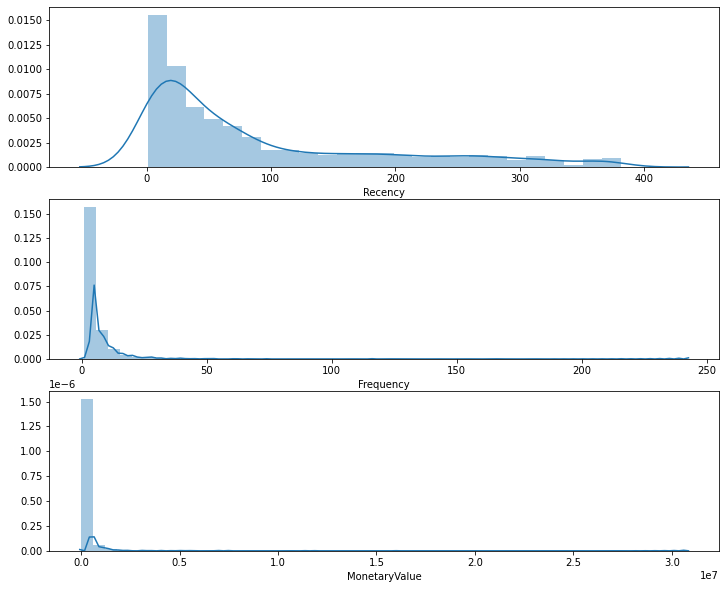

In [77]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(Cust_RFM_1['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(Cust_RFM_1['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(Cust_RFM_1['MonetaryValue'])
# Show the plot
plt.show()

***
The individual RFM scores are highly skewed, with Monetary being the worst. Let's try to spread out the distribution of the scores by taking the natural log values of the variables
***

***
## Treating Outliers and Scaling
***

Feature:  Recency


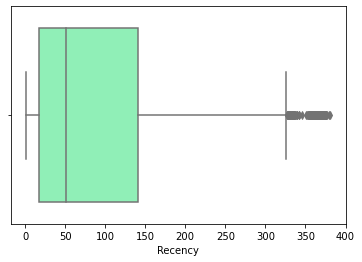

Feature:  Frequency


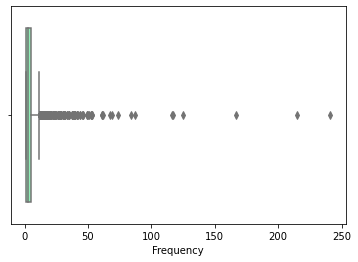

Feature:  MonetaryValue


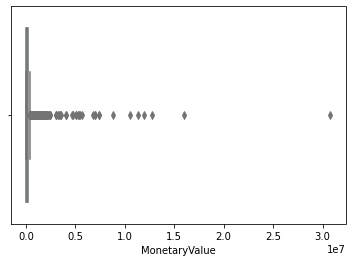

In [78]:
cont_var=['Recency','Frequency','MonetaryValue']
for i in cont_var:
    print('Feature: ', i)
    sns.boxplot(x = Cust_RFM_1[i], data= Cust_RFM_1, palette='rainbow', orient='h', )
    
    plt.show()

In [79]:
def outlier1(cont_var):
    for i in cont_var:
        q1,q2,q3=np.percentile(Cust_RFM_1[i],[25,50,75])
        iqr=q3-q1
        lower_fence=q1-(1.5*iqr)
        upper_fence=q3+(1.5*iqr)
        
        #print(q1,q2,q3)
        #print(lower_fence,upper_fence)
        Cust_RFM_1[i].clip(lower_fence,upper_fence,inplace=True)

outlier1(cont_var)

Feature:  Recency


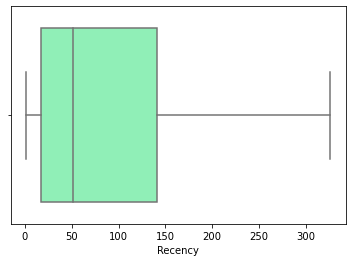

Feature:  Frequency


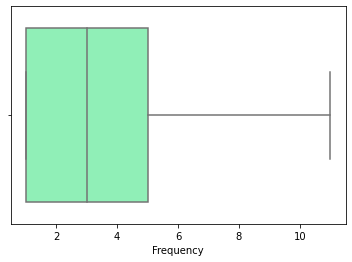

Feature:  MonetaryValue


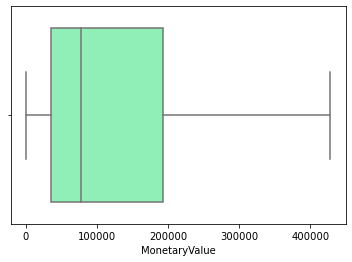

In [80]:
for i in cont_var:
    print('Feature: ', i)
    sns.boxplot(x = Cust_RFM_1[i], data= Cust_RFM_1, palette='rainbow', orient='h', )
    
    plt.show()

***
### Log Transformation
***

In [81]:
Cust_RFM_1['Recency_scaled']=np.log(Cust_RFM_1['Recency'])
Cust_RFM_1['Frequency_scaled']=np.log(Cust_RFM_1['Frequency'])
Cust_RFM_1['MonetaryValue_scaled']=np.log(Cust_RFM_1['MonetaryValue'])


In [82]:
Cust_RFM_1

,CustomerID,Recency,Frequency,MonetaryValue,Recency_scaled,Frequency_scaled,MonetaryValue_scaled
0,2.0,3.0,7,428013.375,1.098612,1.945910,12.966910
1,3.0,76.0,4,209740.000,4.330733,1.386294,12.253624
2,4.0,19.0,1,158562.000,2.944439,0.000000,11.973901
3,5.0,310.0,1,41976.000,5.736572,0.000000,10.644853
4,6.0,36.0,8,144226.000,3.583519,2.079442,11.879137
...,...,...,...,...,...,...,...
4309,4368.0,278.0,1,18916.000,5.627621,0.000000,9.847763
4310,4369.0,181.0,1,10774.000,5.198497,0.000000,9.284891
4311,4370.0,9.0,2,19465.000,2.197225,0.693147,9.876373
4312,4371.0,4.0,11,248308.000,1.386294,2.397895,12.422425


***
For frequency and monetary, the higher the values the better the ranking, unlike recency

Creating Functions for the same
***

In [83]:
def customer_cluster(cluster, group, df, ascending=True):
    initial = (df.groupby(cluster)[group] # This step is to generate a sorted index based on the 'group' mean
                .mean()
                .reset_index()
                .sort_values(by=group, ascending=True)
                .reset_index(drop=True)) 
    initial['index'] = initial.index # Throwing out the old index as a scoring variable
    final = df.reset_index().merge(initial, on=cluster) # Merging with the original DF
    final = (final.drop([cluster], axis=1)
                .rename(columns={"index_y":cluster})) # Dropping the cluster scores, and renaming the old index as the cluster
    return final

In [84]:
def alt_cluster(cluster, group, df, ascending=False):
    initial = (df.groupby(cluster)[group] # This step is to generate a sorted index based on the 'group' mean
                .mean()
                .reset_index()
                .sort_values(by=group, ascending=False)
                .reset_index(drop=True)) 
    initial['index'] = initial.index # Throwing out the old index as a scoring variable
    final = df.reset_index().merge(initial, on=cluster) # Merging with the original DF
    final = (final.drop([cluster], axis=1)
                .rename(columns={"index_y":cluster})) # Dropping the cluster scores, and renaming the old index as the cluster
    return final

***
##### Checking for best Kmeans cluster value
***

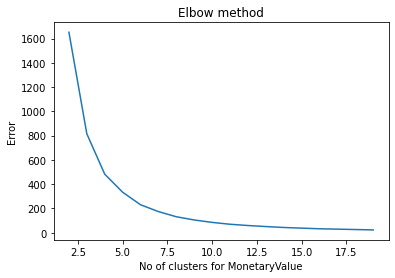

In [85]:
Error =[]

for i in range(2,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Cust_RFM_1[['MonetaryValue_scaled']])
    Error.append(kmeans.inertia_)

    
import matplotlib.pyplot as plt

plt.plot(range(2, 20), Error)

plt.title('Elbow method')
plt.xlabel('No of clusters for MonetaryValue')
plt.ylabel('Error')
plt.show()

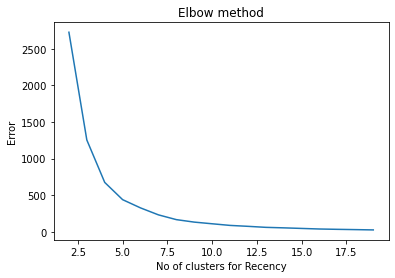

In [86]:
Error =[]

for i in range(2,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Cust_RFM_1[['Recency_scaled']])
    Error.append(kmeans.inertia_)

    
import matplotlib.pyplot as plt

plt.plot(range(2, 20), Error)

plt.title('Elbow method')
plt.xlabel('No of clusters for Recency')
plt.ylabel('Error')
plt.show()

<ipython-input-87-132a8f6db666>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
<ipython-input-87-132a8f6db666>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
<ipython-input-87-132a8f6db666>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
<ipython-input-87-132a8f6db666>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
<ipython-input-87-132a8f6db666>:5: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (16). Possibly due to duplicate points in 

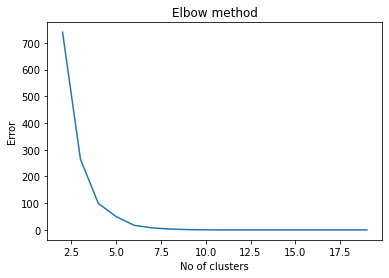

In [87]:
Error =[]

for i in range(2,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
    Error.append(kmeans.inertia_)

    
import matplotlib.pyplot as plt

plt.plot(range(2, 20), Error)

plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [88]:
# 5 clusters seems to be best for all
kmeans = KMeans(n_clusters=5)

In [89]:
kmeans.fit(Cust_RFM_1[['Frequency_scaled']])
cluster_labels = kmeans.labels_
Cust_RFM_1['F'] = cluster_labels

Cust_RFM_1 = customer_cluster('F', 'Frequency_scaled', Cust_RFM_1, True)

print(Cust_RFM_1['F'].value_counts())
Cust_RFM_1.groupby('F')['Frequency'].describe()

0    1317
2     861
1     808
4     707
3     621
Name: F, dtype: int64


,count,mean,std,min,25%,50%,75%,max
F,,,,,,,,
0,1317.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,808.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,861.0,3.443670,0.497106,3.0,3.0,3.0,4.0,4.0
3,621.0,5.780998,0.793335,5.0,5.0,6.0,6.0,7.0
4,707.0,10.189533,1.161592,8.0,9.0,11.0,11.0,11.0


In [89]:
kmeans.fit(Cust_RFM_1[['Recency_scaled']])
cluster_labels = kmeans.labels_
Cust_RFM_1['R'] = cluster_labels

Cust_RFM_1 = alt_cluster('R', 'Recency_scaled', Cust_RFM_1, ascending=False)

print(Cust_RFM_1['R'].value_counts())
Cust_RFM_1.groupby('R')['Recency'].describe()

0    1134
1    1049
2     933
3     780
4     418
Name: R, dtype: int64


,count,mean,std,min,25%,50%,75%,max
R,,,,,,,,
0,1134.0,235.697972,62.770625,132.0,179.0,235.0,291.0,326.375
1,1049.0,79.023832,22.546695,49.0,60.0,74.0,95.0,131.000
2,933.0,31.917471,8.046848,20.0,25.0,31.0,39.0,48.000
3,780.0,12.497436,3.958546,6.0,9.0,12.0,16.0,19.000
4,418.0,3.102871,1.368169,1.0,2.0,3.0,4.0,5.000


In [90]:
kmeans.fit(Cust_RFM_1[['MonetaryValue_scaled']])
cluster_labels = kmeans.labels_
Cust_RFM_1['M'] = cluster_labels

Cust_RFM_1 = customer_cluster('M', 'MonetaryValue_scaled', Cust_RFM_1, True)

print(Cust_RFM_1['M'].value_counts())
Cust_RFM_1.groupby('M')['MonetaryValue'].describe()

2    1102
3     969
1     938
4     929
0     376
Name: M, dtype: int64


,count,mean,std,min,25%,50%,75%,max
M,,,,,,,,
0,376.0,11616.726064,4004.675931,388.0,9179.0,12639.5,14779.250,17192.000
1,938.0,29310.328358,7360.094377,17285.0,22790.5,29224.5,35704.500,42315.000
2,1102.0,65080.454628,15254.585583,42322.0,51685.5,63427.0,77330.750,95620.000
3,969.0,148186.277606,36595.255127,95706.0,116080.0,142405.0,175571.000,225408.000
4,929.0,359850.341900,74317.258786,225886.0,287064.0,391445.0,428013.375,428013.375


In [92]:
Cust_RFM_1.columns

Index(['index_x', 'index_x', 'index_x', 'CustomerID', 'Recency', 'Frequency',
       'MonetaryValue', 'Recency_scaled_x', 'Frequency_scaled_x',
       'MonetaryValue_scaled_x', 'Frequency_scaled_y', 'F', 'Recency_scaled_y',
       'R', 'MonetaryValue_scaled_y', 'M'],
      dtype='object')

In [93]:
Cust_RFM_1.drop(['index_x', 'Frequency_scaled_y', 'Recency_scaled_y', 'MonetaryValue_scaled_y'], axis=1, inplace=True)

### Creating a composite equal-weighted RFM score

In [94]:
Cust_RFM_1

,CustomerID,Recency,Frequency,MonetaryValue,Recency_scaled_x,Frequency_scaled_x,MonetaryValue_scaled_x,F,R,M
0,2.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4
1,72.0,1.0,7,428013.375,0.000000,1.945910,12.966910,3,4,4
2,345.0,4.0,7,428013.375,1.386294,1.945910,12.966910,3,4,4
3,445.0,5.0,5,311232.000,1.609438,1.609438,12.648294,3,4,4
4,670.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4
...,...,...,...,...,...,...,...,...,...,...
4309,888.0,51.0,2,12526.000,3.931826,0.693147,9.435562,1,1,0
4310,1590.0,52.0,2,10630.000,3.951244,0.693147,9.271435,1,1,0
4311,3982.0,109.0,2,6396.000,4.691348,0.693147,8.763428,1,1,0
4312,4177.0,108.0,2,14122.000,4.682131,0.693147,9.555489,1,1,0


In [95]:
# Using equal weights
Cust_RFM_1['rfm_equal'] = Cust_RFM_1['R'] + Cust_RFM_1['F'] + Cust_RFM_1['M']

In [96]:
# Define rfm_level function
def rfm_level(df):
    if df['rfm_equal'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['rfm_equal'] >= 8) and (df['rfm_equal'] < 9)):
        return 'Champions'
    elif ((df['rfm_equal'] >= 7) and (df['rfm_equal'] < 8)):
        return 'Loyal'
    elif ((df['rfm_equal'] >= 6) and (df['rfm_equal'] < 7)):
        return 'Potential'
    elif ((df['rfm_equal'] >= 5) and (df['rfm_equal'] < 6)):
        return 'Promising'
    elif ((df['rfm_equal'] >= 4) and (df['rfm_equal'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
Cust_RFM_1['RFM_Level'] = Cust_RFM_1.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
Cust_RFM_1.head()

,CustomerID,Recency,Frequency,MonetaryValue,Recency_scaled_x,Frequency_scaled_x,MonetaryValue_scaled_x,F,R,M,rfm_equal,RFM_Level
0,2.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4,11,Can't Loose Them
1,72.0,1.0,7,428013.375,0.000000,1.945910,12.966910,3,4,4,11,Can't Loose Them
2,345.0,4.0,7,428013.375,1.386294,1.945910,12.966910,3,4,4,11,Can't Loose Them
3,445.0,5.0,5,311232.000,1.609438,1.609438,12.648294,3,4,4,11,Can't Loose Them
4,670.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4,11,Can't Loose Them


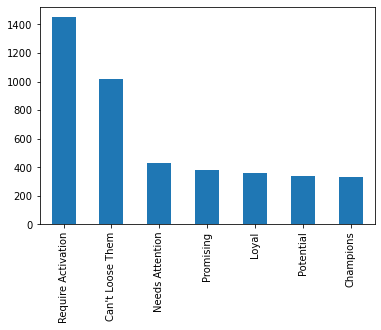

In [97]:
Cust_RFM_1['RFM_Level'].value_counts().plot(kind='bar')

In [98]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = Cust_RFM_1.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      16.0       8.6      315219.7  1017
Champions             38.4       5.1      186867.0   334
Loyal                 45.4       4.1      142724.9   363
Needs Attention       91.1       1.9       66416.3   432
Potential             58.6       3.2      106132.0   340
Promising             75.9       2.6       87451.3   378
Require Activation   177.6       1.3       33681.9  1450


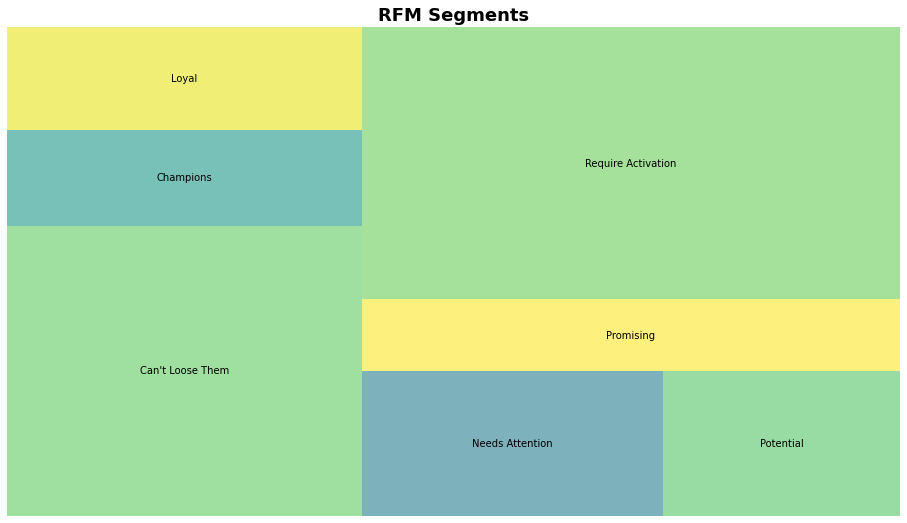

In [99]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [100]:
Cust_RFM_1

,CustomerID,Recency,Frequency,MonetaryValue,Recency_scaled_x,Frequency_scaled_x,MonetaryValue_scaled_x,F,R,M,rfm_equal,RFM_Level
0,2.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4,11,Can't Loose Them
1,72.0,1.0,7,428013.375,0.000000,1.945910,12.966910,3,4,4,11,Can't Loose Them
2,345.0,4.0,7,428013.375,1.386294,1.945910,12.966910,3,4,4,11,Can't Loose Them
3,445.0,5.0,5,311232.000,1.609438,1.609438,12.648294,3,4,4,11,Can't Loose Them
4,670.0,3.0,7,428013.375,1.098612,1.945910,12.966910,3,4,4,11,Can't Loose Them
...,...,...,...,...,...,...,...,...,...,...,...,...
4309,888.0,51.0,2,12526.000,3.931826,0.693147,9.435562,1,1,0,2,Require Activation
4310,1590.0,52.0,2,10630.000,3.951244,0.693147,9.271435,1,1,0,2,Require Activation
4311,3982.0,109.0,2,6396.000,4.691348,0.693147,8.763428,1,1,0,2,Require Activation
4312,4177.0,108.0,2,14122.000,4.682131,0.693147,9.555489,1,1,0,2,Require Activation


## Method II

In [101]:
Cust_RFM_2=Cust_RFM_1[['CustomerID','Recency_scaled_x','Frequency_scaled_x','MonetaryValue_scaled_x','Recency','Frequency','MonetaryValue']]

In [102]:
inertias = []

for k in range(2,20):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Cust_RFM_2[['Recency_scaled_x','Frequency_scaled_x','MonetaryValue_scaled_x']])
    inertias.append(kmeans.inertia_)

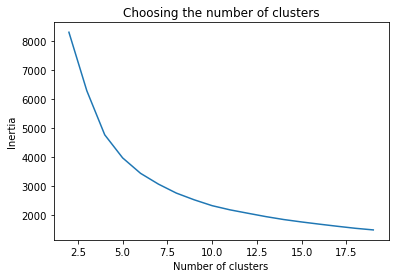

In [103]:
plt.plot(range(2, 20), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [104]:
# Chosing 7 clusters
k=7

In [105]:
model = KMeans(n_clusters=k, random_state=0)
model.fit(Cust_RFM_2[['Recency_scaled_x','Frequency_scaled_x','MonetaryValue_scaled_x']])

KMeans(n_clusters=7, random_state=0)

In [106]:
cluster_labels = model.labels_


# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 5.25898643  0.47900989 10.93475374]
 [ 2.42578661  0.97486903 11.13067418]
 [ 2.94278063  2.03197789 12.56438223]
 [ 3.71490841  0.25325498 10.3272805 ]
 [ 1.04327955  2.09148775 12.56150768]
 [ 5.39066779  0.11827847  9.6351803 ]
 [ 4.25871878  1.32470102 11.86119691]]


In [107]:

# Append clusters to input features table
Cust_RFM_2['clusters'] = cluster_labels
Cust_RFM_2.head()

<ipython-input-107-f8477acee8d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_RFM_2['clusters'] = cluster_labels


,CustomerID,Recency_scaled_x,Frequency_scaled_x,MonetaryValue_scaled_x,Recency,Frequency,MonetaryValue,clusters
0,2.0,1.098612,1.945910,12.966910,3.0,7,428013.375,4
1,72.0,0.000000,1.945910,12.966910,1.0,7,428013.375,4
2,345.0,1.386294,1.945910,12.966910,4.0,7,428013.375,4
3,445.0,1.609438,1.609438,12.648294,5.0,5,311232.000,4
4,670.0,1.098612,1.945910,12.966910,3.0,7,428013.375,4


In [108]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg_1 = Cust_RFM_2.groupby('clusters').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg_1)

         Recency Frequency MonetaryValue      
            mean      mean          mean count
clusters                                      
0          206.2       1.8       62553.2   720
1           13.7       2.9       77574.5   517
2           21.9       8.1      307315.6   696
3           46.0       1.4       35800.5   686
4            3.3       8.7      314979.7   374
5          234.5       1.2       17418.0   526
6           80.7       4.2      164671.3   795


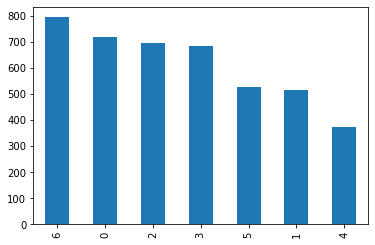

In [109]:
Cust_RFM_2['clusters'].value_counts().plot(kind='bar')

***
##### Note Cluster name to be given after studying the average RFM scores of each cluster predicted 
***

In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['clusters'] == 5:
        return 'Can\'t Loose Them'
    elif df['clusters'] ==2:
        return 'Champions'
    elif df['clusters'] == 0:
        return 'Potential'
    elif df['clusters'] ==4:
        return 'Needs Attention'
    elif df['clusters'] ==6:
        return 'At Risk'
    elif df['clusters'] ==5:
        return 'Hibernating'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
Cust_RFM_2['cluster_name'] = Cust_RFM_2.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
Cust_RFM_2.head()

<ipython-input-110-095a8215fda4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_RFM_2['cluster_name'] = Cust_RFM_2.apply(rfm_level, axis=1)


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg_1 = Cust_RFM_2.groupby('cluster_name').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg_1)

In [ ]:
Cust_RFM_2['cluster_name'].value_counts().plot(kind='bar')

## Conclusion

***
From here, we can see that (~24%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty!
***

***
The other will need some work. Let’s explore using some ads to re-target them:

Potential — high potential to enter our champion customer segments, why not throw in some freebies on their next purchase to show that you value them!
***
At Risk - Our loyal old customers with good quantity and value of their purchase but it has been a while since they last bought something from us. Let’s target them with their wish list items and a limited time offer discount
***
Needs Attention — Again New Customers, but seems like they were not happy with the service. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them
***
Hibernating - made some initial purchases but have not seen them since. Reactivate them. Recreate brand value. Offer relevant products and good offers. Share valuable resources
***

Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.
***